### Feature Engineering with Linear Regression using Ames Housing Data

In this notebook, we will build some linear regression models to predict housing prices from this data.

    1. Simple EDA and baseline our model
    2. Feature Engineering: adding polynomial terms
    3. Feature Engineering: adding interaction terms

Some of the basic steps which we will also perform are:
    1. Splitting our data in train test split
    2. EDA
    3. MAE - Mean Absolute Error as our error metric

1. Simple EDA and baseline our model

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported!")

Libraries imported!


#### Load up our dataset

In [6]:
url = "https://bit.ly/316tYZT"

df = pd.read_csv(url)

df.head(10)

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2,215000
1,11622,5,6,1961,1961,896,1,2,0,1,105000
2,14267,6,6,1958,1958,1329,1,3,0,1,172000
3,11160,7,5,1968,1968,2110,2,3,2,2,244000
4,13830,5,5,1997,1998,1629,2,3,1,2,189900
5,9978,6,6,1998,1998,1604,2,3,1,2,195500
6,4920,8,5,2001,2001,1338,2,2,0,2,213500
7,5005,8,5,1992,1992,1280,2,2,0,2,191500
8,5389,8,5,1995,1996,1616,2,2,1,2,236500
9,7500,7,5,1999,1999,1804,2,3,1,2,189000


In [7]:
df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.764444,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.760405,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
 10  SalePrice       2925 non-null   int64
dtypes: int64(11)
memory usage: 251.5 KB


#### Let's do some more EDA - Correlation analysis

In [9]:
cor = df.corr()

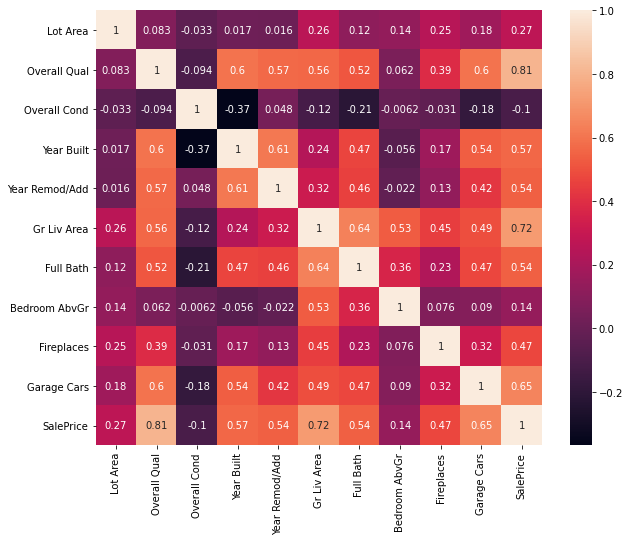

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True)

#### Obtain our X and y

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

#### Next we want to perform train_text_split, 80/20. To baseline our model.

In [14]:
from sklearn.model_selection import train_test_split #import train test split


In [21]:
from sklearn.linear_model import LinearRegression #Step 1: import our model
from sklearn.metrics import mean_absolute_error

In [27]:
#baseline of our model
def split_n_train(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    regressor = LinearRegression() #step 2: instaniate our model
    regressor.fit(X_train,y_train) #step 3: fit our model/train our model
    y_pred = regressor.predict(X_test) #step 4: get predictions

    #MAE
    print("Mean Absolute Error result in terms of sales price :",
         str(mean_absolute_error(y_test,y_pred))) #step 5: For our evaluation metric

In [28]:
split_n_train(X,y)

Mean Absolute Error result in terms of sales price : 23315.163572353777


### 2. Feature Engineering; adding polynomial terms

We want to improve our sales price score in terms of MAE! The lower the score the better our model is doing!

We want to use what we have seend in our correlation analysis, so that we can add in higher order terms.

We are still working here in linear terms, jiust that now with polynomial terms, our model becomes quadratic in nature.

In [30]:
X2 = X.copy()
X2["OQ2"] = X2["Overall Qual"] ** 2
X2["GLA2"] = X2["Gr Liv Area"] ** 2

In [31]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
 10  OQ2             2925 non-null   int64
 11  GLA2            2925 non-null   int64
dtypes: int64(12)
memory usage: 274.3 KB


In [32]:
split_n_train(X2,y)

Mean Absolute Error result in terms of sales price : 19822.651950844276


### 3. Feature Engineering: adding interaction terms

We can take a look at the possibility of "overall Qual" being affected by "Year Built"

In [35]:
X3 = X2.copy()

#multiplicative interaction overall quality and year built
X3["OQ_mul_YB"] = X3["Overall Qual"] * X3["Year Built"]

#division interaction
X3["OQ_div_YB"] = X3["Overall Qual"] / X3["Lot Area"]

In [36]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   int64  
 10  OQ2             2925 non-null   int64  
 11  GLA2            2925 non-null   int64  
 12  OQ_mul_YB       2925 non-null   int64  
 13  OQ_div_YB       2925 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 320.0 KB


In [37]:
split_n_train(X3,y)

Mean Absolute Error result in terms of sales price : 19345.93789625038


#### Not too bad, we have small boost from our feature engineering using interaction term.

## Exercise - Add additional interaction terms and tune the model to reduce our MAE score!

In [49]:
X4 = X3.copy()
X4["GC_mul_YB"] = X4["Garage Cars"] * X4["Year Built"]
X4["OQ_mul_YRA"] = X4["Overall Qual"] * X4["Year Remod/Add"]
X4["OQ_mul_FB"] = X4["Overall Qual"] * X4["Gr Liv Area"]
X4.info()

split_n_train(X4,y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   int64  
 10  OQ2             2925 non-null   int64  
 11  GLA2            2925 non-null   int64  
 12  OQ_mul_YB       2925 non-null   int64  
 13  OQ_div_YB       2925 non-null   float64
 14  GC_mul_YB       2925 non-null   int64  
 15  OQ_mul_YRA      2925 non-null   int64  
 16  OQ_mul_FB       2925 non-null   int64  
dtypes: float64(1), int64(16)
memory u

### End of Feature engineering workshop